# Tensor-Flow

## Daniel Wilcox: 19147414

This example problem can be found within chapter 9 of the "Hands-on Machine Learning with Scikit-Learn and TensorFlow" by Aurélien Géron. 

This project will be investigating the theory behind Neural/deep networks and how to implament them.

In [3]:
import tensorflow as tf

import time
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

## Get Data

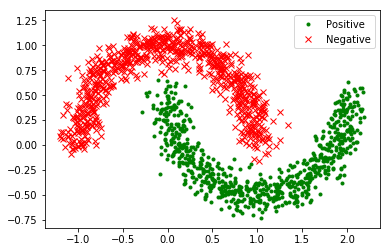

In [13]:
n_sample = 1500
X_moons, y_moons = make_moons(n_sample, noise=0.1)

plt.plot(X_moons[y_moons == 1, 0], X_moons[y_moons == 1, 1], 'g.', label="Positive")
plt.plot(X_moons[y_moons == 0, 0], X_moons[y_moons == 0, 1], 'rx', label="Negative")
plt.legend()
plt.show()

In [18]:
X_moon_bias = np.c_[np.ones((n_sample, 1)), X_moons]
X_moon_bias[:3]

array([[ 1.        , -0.31692079,  0.98045238],
       [ 1.        ,  1.06024648,  0.15641785],
       [ 1.        , -0.47824968,  0.66991063]])

In [25]:
y_col = y_moons.reshape(-1, 1)
y_col[:3]

array([[0],
       [0],
       [0]])

In [26]:
from sklearn.model_selection import train_test_split

perc = 0.2

X_train, X_test, y_train, y_test = train_test_split(
    X_moon_bias, y_col, test_size=perc)



In [30]:
def rand_batch(X, y, b_size):
    rand_idx = np.random.randint(0, len(X), b_size)
    X_b = X[rand_idx]
    y_b = y[rand_idx]
    return X_b, y_b
    

X_batch, y_batch = rand_batch(X_train, y_train, 3)
X_batch

array([[ 1.        ,  1.19399164, -0.46498165],
       [ 1.        ,  0.67440234, -0.48852102],
       [ 1.        , -0.1538499 ,  1.16373581]])

In [31]:
y_batch

array([[1],
       [1],
       [0]])

## TF

In [35]:
reset_graph()

#number of features
n_inputs = 2

In [36]:
#Log-reg

X = tf.placeholder(tf.float32, shape=(None, n_inputs + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

theta = tf.Variable(tf.random_uniform([n_inputs + 1, 1], -1.0, 1.0, seed=42), name="theta")

logits = tf.matmul(X, theta, name="logits")
y_proba = tf.sigmoid(logits)

In [37]:
#default epsilon: 1e-7

loss = tf.losses.log_loss(y, y_proba)  

Instructions for updating:
Use tf.cast instead.


In [38]:
#optimizer
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

In [40]:
#initialize

init = tf.global_variables_initializer()

In [41]:
#run tf model:

n_epochs = 1000
batch_size = 50
n_batches = int(np.ceil(n_sample / batch_size))

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = rand_batch(X_train, y_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        loss_val = loss.eval({X: X_test, y: y_test})
        if epoch % 100 == 0:
            print("Epoch:", epoch, "\tLoss:", loss_val)

    y_proba_val = y_proba.eval(feed_dict={X: X_test, y: y_test})

Epoch: 0 	Loss: 0.7949106
Epoch: 100 	Loss: 0.29550764
Epoch: 200 	Loss: 0.2654766
Epoch: 300 	Loss: 0.25375548
Epoch: 400 	Loss: 0.24795921
Epoch: 500 	Loss: 0.24493465
Epoch: 600 	Loss: 0.24270688
Epoch: 700 	Loss: 0.24122599
Epoch: 800 	Loss: 0.24061991
Epoch: 900 	Loss: 0.24008651


In [43]:
from sklearn.metrics import precision_score, recall_score

y_pred = (y_proba_val >= 0.5)
y_pred[:5]

prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print('Precision score: {:.2f}%\nRecall score: {:.2f}%'.format(prec, rec))

Precision score: 0.91%
Recall score: 0.88%
